<a href="https://colab.research.google.com/github/Natruja-W/229352-StatisticalLearning/blob/main/Lab05_decision_tree_bagging_RF_660510738.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

In [10]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

In [ ]:
gridcv.best_estimator_

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [16]:
clf = DecisionTreeClassifier()

In [19]:
from sklearn.metrics import classification_report

In [20]:
bagged_trees = BaggingClassifier(estimator = clf, n_estimators=100, random_state=0)

bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.76      0.80      0.78        35

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [21]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)
print(classification_report(y_test, random_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        41
           1       0.78      0.83      0.81        35

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [25]:
from sklearn.metrics import f1_score, accuracy_score

Decision Tree

In [26]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('tree', DecisionTreeClassifier())
])

param_grid = {
    'tree__max_depth': [3, 5, 7, 9, 11],
    'tree__min_samples_split': [2, 5, 8, 10],
    'tree__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"f1_macro: {f1_score(y_test, y_pred, average='macro'):.3f}")

Best parameters: {'tree__max_depth': 5, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 10}
accuracy: 0.789
f1_macro: 0.788


Bagged Decision Tree

In [27]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('bagged_tree', BaggingClassifier(random_state=0))
])

param_grid = {
    'bagged_tree__n_estimators': [50, 100, 200],
    'bagged_tree__max_samples': [0.5, 0.8, 1.0],
    'bagged_tree__max_features': [0.5, 0.8, 1.0]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"f1_macro: {f1_score(y_test, y_pred, average='macro'):.3f}")

Best parameters: {'bagged_tree__max_features': 0.8, 'bagged_tree__max_samples': 0.5, 'bagged_tree__n_estimators': 50}
accuracy: 0.789
f1_macro: 0.789


Random Forest

In [29]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('random_forest', RandomForestClassifier(random_state=0))
])

param_grid = {
    'random_forest__n_estimators': [50, 100, 200],
    'random_forest__max_depth': [3, 5, 7, 10],
    'random_forest__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print(f"Best parameters: {grid_search.best_params_}")
print(f"accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"f1_macro: {f1_score(y_test, y_pred, average='macro'):.3f}")

Best parameters: {'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 4, 'random_forest__n_estimators': 100}
accuracy: 0.829
f1_macro: 0.828


**1.What is your best model?**

The best model is Random Forest that represented by accuracy 0.829 and f1_macro 0.828


**2.What hyperparameters did you choose?**

Chosen hyperparameters are The maximum depth of the tree, The minimum number of samples required to be at a leaf node, and The number of trees in the forest


**3.What are the best values of your hyperparameters?**

The best values for hyperparameters are RandomForestClassifier(random_state=0, n_estimators = 10, max_depth = 10, )

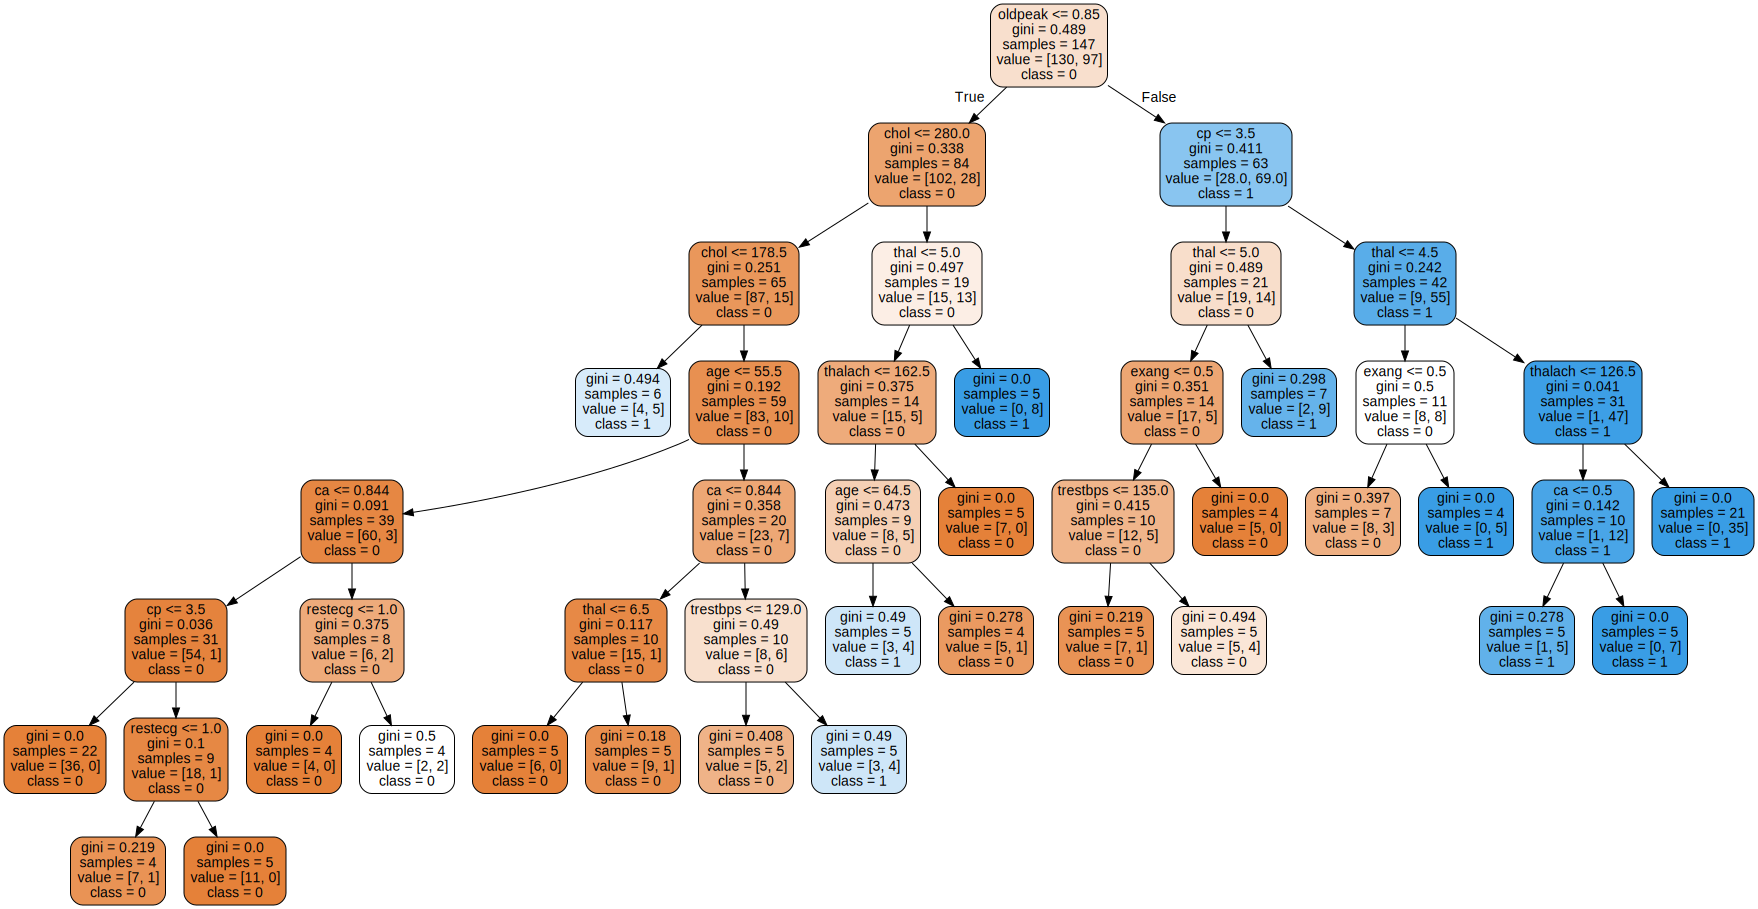

In [37]:
best_forest = grid_search.best_estimator_.named_steps['random_forest']

best_tree = best_forest.estimators_[0]

plot_data = export_graphviz(best_tree,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph